<a href="https://colab.research.google.com/github/Rahul-dsml/Myprojects/blob/main/Demand_for_shared_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demand for Shared Bikes

Importing relvant libraries

In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Reading and Understanding the dataset

In [94]:
data= pd.read_csv('/content/drive/MyDrive/UpGrad/Regression/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no missing values in the dataset.
The 'dtedy' column datatype is 'object' instead of data-time datatype

In [96]:
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'].dtype

dtype('<M8[ns]')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [98]:
data['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

It is a season column which is a nominal categorical feature. So it needs to be converted to string first.

In [99]:
print(data[data.season== 1]['mnth'].unique())
print(data[data.season== 2]['mnth'].unique())
print(data[data.season== 3]['mnth'].unique())
print(data[data.season== 4]['mnth'].unique())

[ 1  2  3 12]
[3 4 5 6]
[6 7 8 9]
[ 9 10 11 12]


In [100]:
def season(x):
  if x == 1:
    return 'Dec-Mar'
  elif x== 2:
    return 'Mar-Jun'
  elif x == 3:
    return 'Jun-Sep'
  else:
    return 'Sep-Dec'

In [101]:
data.season= data.season.apply(season)
data.season.value_counts()

Jun-Sep    188
Mar-Jun    184
Dec-Mar    180
Sep-Dec    178
Name: season, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


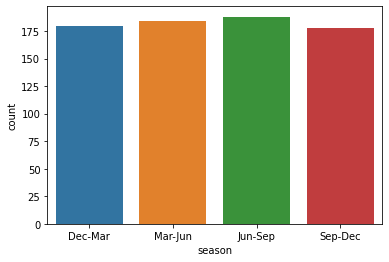

In [102]:
sns.countplot(data.season)
plt.show()

In [103]:
data['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


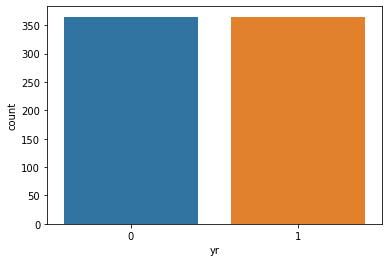

In [104]:
sns.countplot(data.yr)
plt.show()

Year-0 : 2018
Year-1 : 2019

In [105]:
data['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

The month column is also a nominal categorical variable, so converting it to string

In [106]:
def month(x):
  if x == 1:
    return 'Jan'
  elif x == 2:
    return 'Feb'
  elif x== 3:
    return 'Mar'
  elif x== 4:
    return 'Apr'
  elif x== 5:
    return 'May'
  elif x == 6:
    return 'Jun'
  elif x== 7:
    return 'Jul'
  elif x== 8:
    return 'Aug'
  elif x== 9:
    return 'Sep'
  elif x== 10:
    return 'Oct'
  elif x== 11:
    return 'Nov'
  else:
    return 'Dec'

In [107]:
data.mnth= data.mnth.apply(month)
data.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


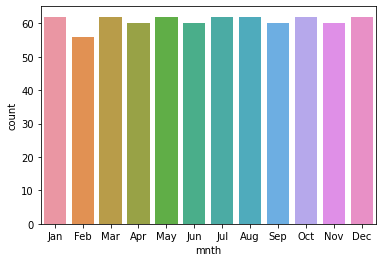

In [108]:
sns.countplot(data.mnth)
plt.show()

In [109]:
data.holiday.unique()

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


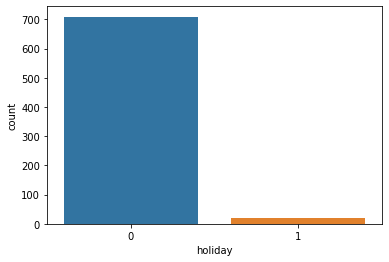

In [110]:
sns.countplot(data.holiday)
plt.show()

Holiday variable gives yes or No answer. It seems to be highly biased.

In [111]:
data.weekday.unique()

array([1, 2, 3, 4, 5, 6, 0])

In [112]:
def weekdays(x):
  if x== 1:
    return 'Mon'
  elif x== 2:
    return 'Tue'
  elif x== 3:
    return 'Wed'
  elif x == 4:
    return 'Thu'
  elif x== 5:
    return 'Fri'
  elif x== 6:
    return 'Sat'
  else:
    return 'Sun'


In [113]:
data.weekday= data.weekday.apply(weekdays)
data.weekday.value_counts()

Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: weekday, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


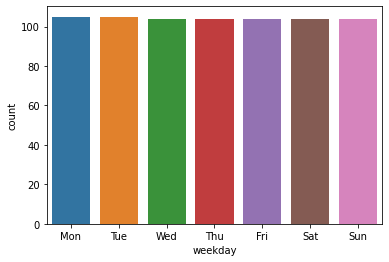

In [114]:
sns.countplot(data.weekday)
plt.show()

In [115]:
data.workingday.unique()

array([1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


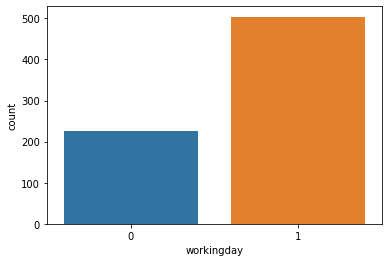

In [116]:
sns.countplot(data.workingday)
plt.show()

In [117]:
data.workingday.value_counts(normalize=True)

1    0.690411
0    0.309589
Name: workingday, dtype: float64

In [118]:
data.weathersit.unique()

array([2, 1, 3])

In [119]:
def weather(x):
    if x==1:
        return 'Clear'
    elif x==2:
        return 'Cloudy'
    elif x==3:
        return 'Light Rain'
    elif x==4:
        return 'Heavy Rain'

data.weathersit= data.weathersit.apply(weather)
data.weathersit.value_counts()

Clear         463
Cloudy        246
Light Rain     21
Name: weathersit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


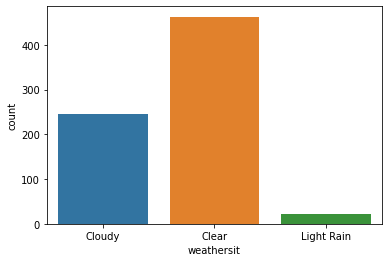

In [120]:
sns.countplot(data.weathersit)
plt.show()

In [121]:
data.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

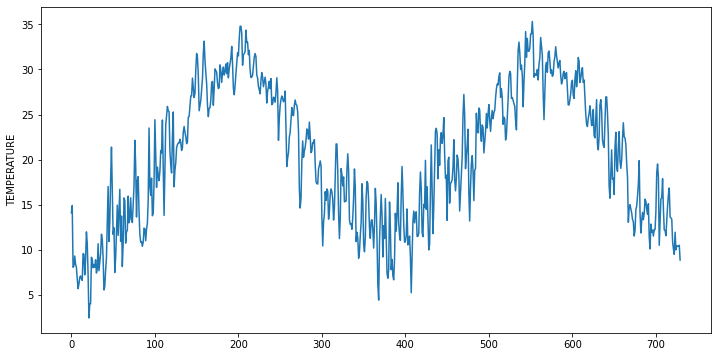

In [122]:
plt.figure(figsize=(12,6))
plt.plot(data.temp)
plt.ylabel('TEMPERATURE')
plt.show()

In [123]:
data.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

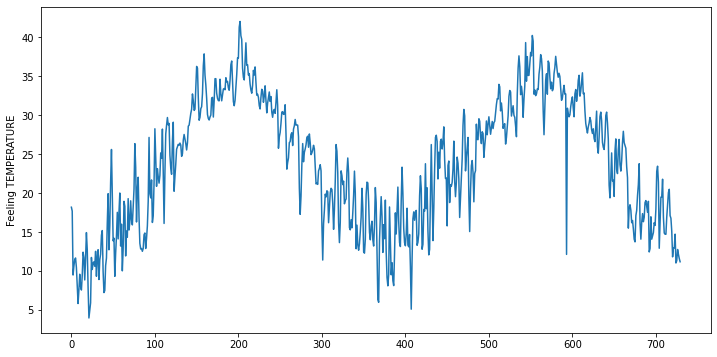

In [124]:
plt.figure(figsize=(12,6))
plt.plot(data.atemp)
plt.ylabel('Feeling TEMPERATURE')
plt.show()

In [125]:
data.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

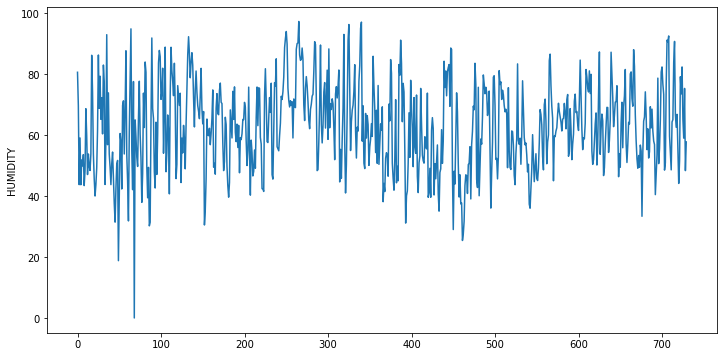

In [126]:
plt.figure(figsize=(12,6))
plt.plot(data.hum)
plt.ylabel('HUMIDITY')
plt.show()

In [127]:
data.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

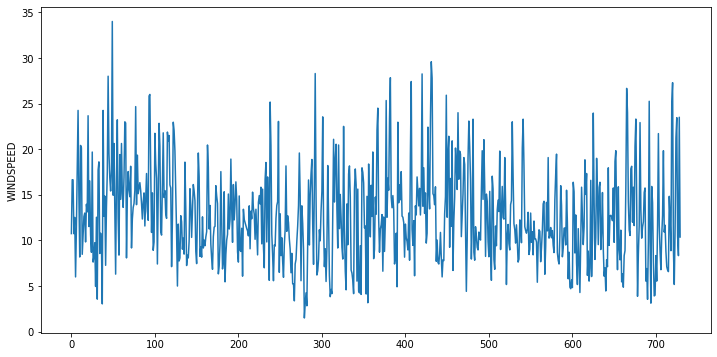

In [128]:
plt.figure(figsize=(12,6))
plt.plot(data.windspeed)
plt.ylabel('WINDSPEED')
plt.show()

In [129]:
data.casual.describe()

count     730.000000
mean      849.249315
std       686.479875
min         2.000000
25%       316.250000
50%       717.000000
75%      1096.500000
max      3410.000000
Name: casual, dtype: float64

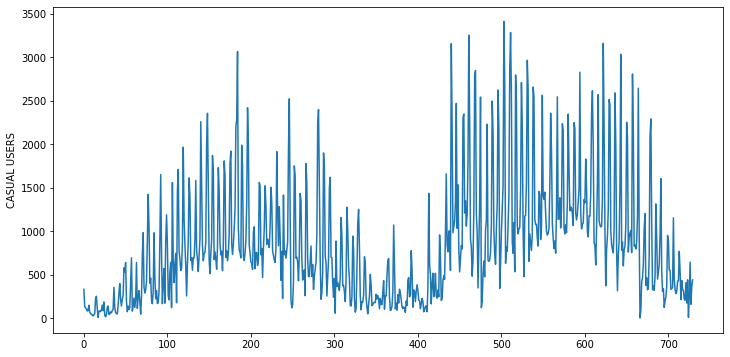

In [130]:
plt.figure(figsize=(12,6))
plt.plot(data.casual)
plt.ylabel('CASUAL USERS')
plt.show()

In [131]:
data.registered.describe()

count     730.000000
mean     3658.757534
std      1559.758728
min        20.000000
25%      2502.250000
50%      3664.500000
75%      4783.250000
max      6946.000000
Name: registered, dtype: float64

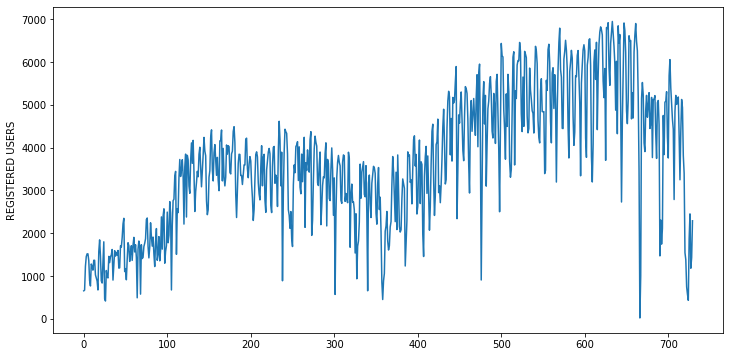

In [132]:
plt.figure(figsize=(12,6))
plt.plot(data.registered)
plt.ylabel('REGISTERED USERS')
plt.show()

In [133]:
data.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

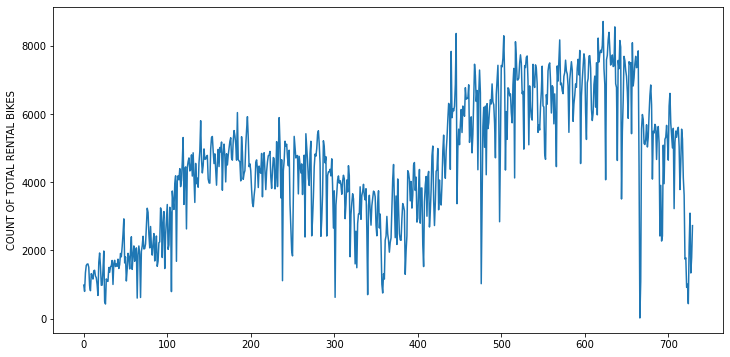

In [134]:
plt.figure(figsize=(12,6))
plt.plot(data.cnt)
plt.ylabel('COUNT OF TOTAL RENTAL BIKES')
plt.show()

Exploratory Data Analysis

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

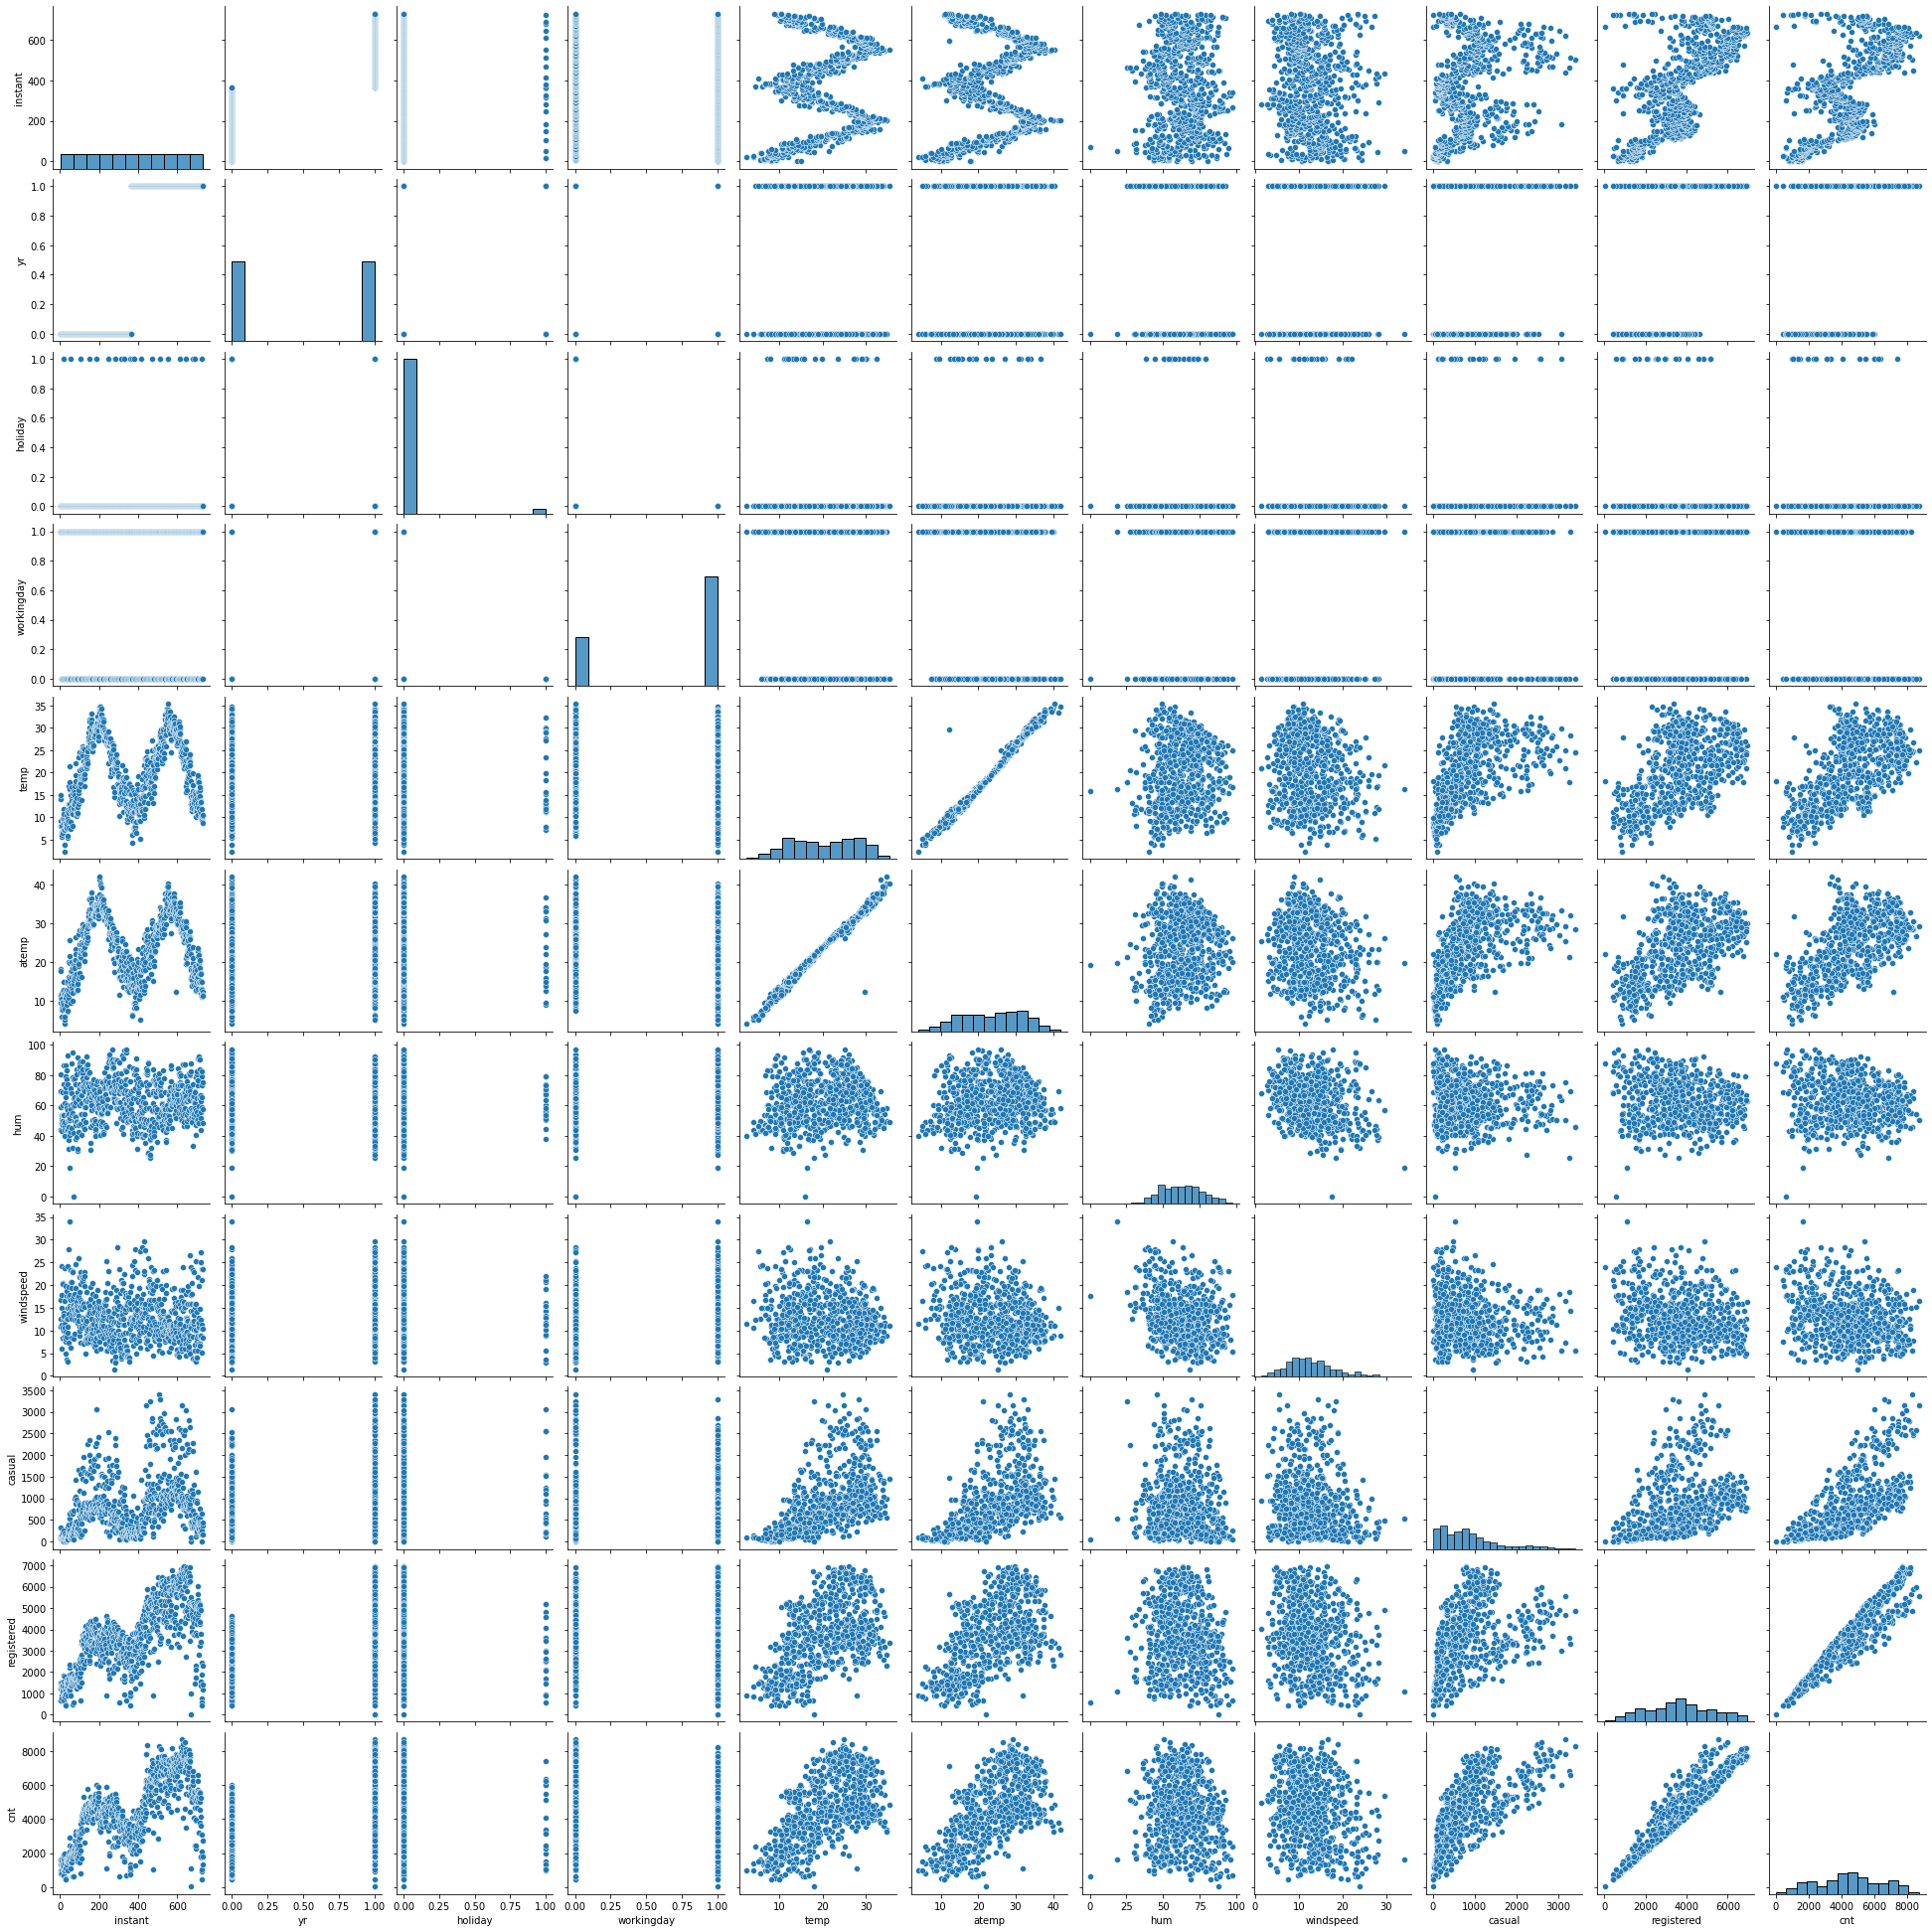

In [136]:
sns.pairplot(data)
plt.show()

In [137]:
cat_cols= data.select_dtypes('object').columns

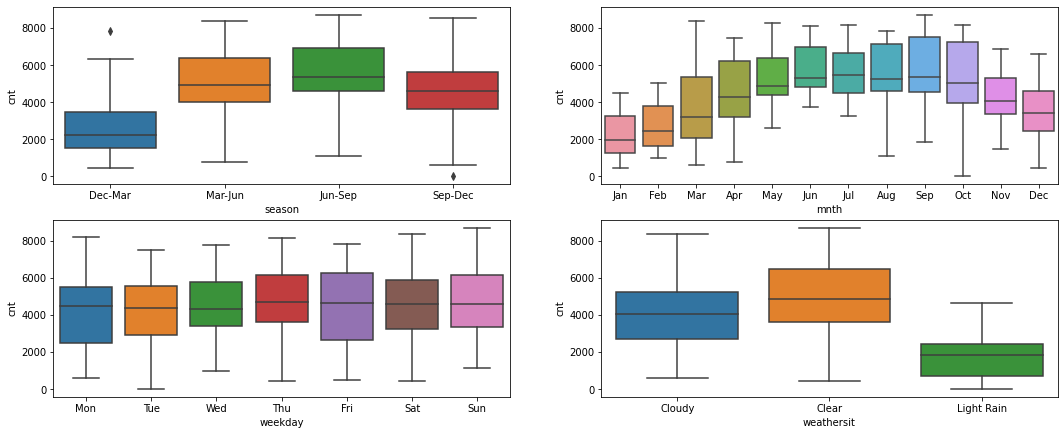

In [138]:
plt.figure(figsize=[18,15])
for i in range(1, len(cat_cols)+1):
    plt.subplot(4,2,i)
    sns.boxplot(data= data, x= cat_cols[i-1], y='cnt')
plt.show()

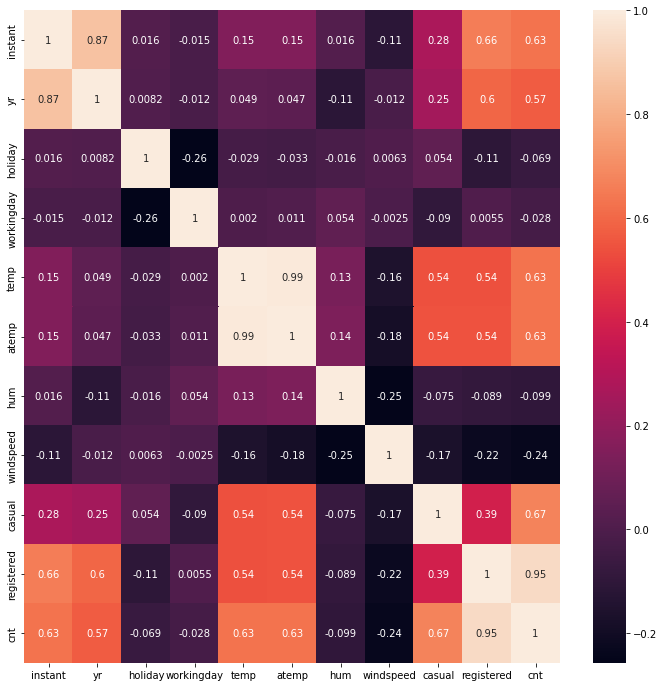

In [139]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

'temp' and 'atemp' are highly correlated, so drop 'atemp' column.


In [140]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [141]:
col_to_drop= ['instant', 'dteday', 'atemp', 'registered', 'casual']

In [142]:
data.drop(col_to_drop, axis=1, inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Dec-Mar,0,Jan,0,Mon,1,Cloudy,14.110847,80.5833,10.749882,985
1,Dec-Mar,0,Jan,0,Tue,1,Cloudy,14.902598,69.6087,16.652113,801
2,Dec-Mar,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Dec-Mar,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,Dec-Mar,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


Data Preparation for Model Building

In [143]:
data.select_dtypes('object').head()

,season,mnth,weekday,weathersit
0,Dec-Mar,Jan,Mon,Cloudy
1,Dec-Mar,Jan,Tue,Cloudy
2,Dec-Mar,Jan,Wed,Clear
3,Dec-Mar,Jan,Thu,Clear
4,Dec-Mar,Jan,Fri,Clear


categorical columns are to be converted into numbers.

In [144]:
cat_cols= data.select_dtypes('object').columns

In [145]:
df_dummies= pd.get_dummies(data[cat_cols], drop_first= True)
df_dummies.head()

,season_Jun-Sep,season_Mar-Jun,season_Sep-Dec,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


concatenating the dummies dataframe and data.

In [146]:
df= pd.concat([data, df_dummies], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_Jun-Sep,season_Mar-Jun,season_Sep-Dec,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,Dec-Mar,0,Jan,0,Mon,1,Cloudy,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,Dec-Mar,0,Jan,0,Tue,1,Cloudy,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,Dec-Mar,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Dec-Mar,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Dec-Mar,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dropping the categorical variables

In [147]:
df.drop(cat_cols, axis=1, inplace=True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Jun-Sep,season_Mar-Jun,season_Sep-Dec,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_Jun-Sep         730 non-null    uint8  
 8   season_Mar-Jun         730 non-null    uint8  
 9   season_Sep-Dec         730 non-null    uint8  
 10  mnth_Aug               730 non-null    uint8  
 11  mnth_Dec               730 non-null    uint8  
 12  mnth_Feb               730 non-null    uint8  
 13  mnth_Jan               730 non-null    uint8  
 14  mnth_Jul               730 non-null    uint8  
 15  mnth_J

Converting the datatype 'uint8' to 'int64'

In [149]:
cols= df_dummies.columns
for col in cols:
  df[col]= df[col].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_Jun-Sep         730 non-null    int64  
 8   season_Mar-Jun         730 non-null    int64  
 9   season_Sep-Dec         730 non-null    int64  
 10  mnth_Aug               730 non-null    int64  
 11  mnth_Dec               730 non-null    int64  
 12  mnth_Feb               730 non-null    int64  
 13  mnth_Jan               730 non-null    int64  
 14  mnth_Jul               730 non-null    int64  
 15  mnth_J

Splitting the dataset into train and test

In [150]:
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(df, train_size= 0.75, random_state= 17)
print(df_train.shape)
print(df_test.shape)

(547, 29)
(183, 29)


In [151]:
train= df_train.copy()
test= df_test.copy()

In [152]:
y_train= train.pop('cnt')
X_train= train
y_test= test.pop('cnt')
X_test= test

In [153]:
print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)

(547, 28) (547,)

(183, 28) (183,)


In [154]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Jun-Sep,season_Mar-Jun,season_Sep-Dec,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
421,1,0,1,11.445847,41.0000,13.750343,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
542,1,0,1,28.597500,36.0000,18.208925,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
242,0,0,1,26.923347,59.7917,5.583331,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
392,1,0,1,12.949153,54.3333,14.125543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Scaling the variables

In [155]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
col= X_train.columns
X_train_scaled= scaler.fit_transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled)
X_train_scaled.columns= col
X_train_scaled.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Jun-Sep,season_Mar-Jun,season_Sep-Dec,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,1.001830,-0.173585,0.662928,-1.130140,-1.555199,0.231250,-0.569610,-0.580869,-0.572425,-0.303012,-0.292092,3.467537,-0.324115,-0.292092,-0.299402,-0.299402,-0.295762,-0.324115,-0.292092,-0.288389,-0.425941,-0.398621,-0.407813,-0.434891,2.548166,-0.416917,-0.714877,-0.162069
1,1.001830,-0.173585,0.662928,1.144851,-1.914558,1.082035,1.755588,-0.580869,-0.572425,-0.303012,-0.292092,-0.288389,-0.324115,-0.292092,3.339993,-0.299402,-0.295762,-0.324115,-0.292092,-0.288389,-0.425941,-0.398621,-0.407813,2.299425,-0.392439,-0.416917,-0.714877,-0.162069
2,-0.998174,-0.173585,0.662928,0.922792,-0.204604,-1.327176,1.755588,-0.580869,-0.572425,3.300198,-0.292092,-0.288389,-0.324115,-0.292092,-0.299402,-0.299402,-0.295762,-0.324115,-0.292092,-0.288389,-0.425941,-0.398621,-0.407813,-0.434891,-0.392439,-0.416917,-0.714877,-0.162069
3,-0.998174,-0.173585,-1.508459,-0.092346,1.340640,0.135798,-0.569610,-0.580869,1.746955,-0.303012,-0.292092,-0.288389,-0.324115,-0.292092,-0.299402,-0.299402,-0.295762,-0.324115,3.423584,-0.288389,-0.425941,2.508652,-0.407813,-0.434891,-0.392439,-0.416917,1.398841,-0.162069
4,1.001830,-0.173585,0.662928,-0.930742,-0.596910,0.302846,-0.569610,-0.580869,-0.572425,-0.303012,-0.292092,-0.288389,3.085325,-0.292092,-0.299402,-0.299402,-0.295762,-0.324115,-0.292092,-0.288389,2.347745,-0.398621,-0.407813,-0.434891,-0.392439,-0.416917,-0.714877,-0.162069


In [156]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     547 non-null    float64
 1   holiday                547 non-null    float64
 2   workingday             547 non-null    float64
 3   temp                   547 non-null    float64
 4   hum                    547 non-null    float64
 5   windspeed              547 non-null    float64
 6   season_Jun-Sep         547 non-null    float64
 7   season_Mar-Jun         547 non-null    float64
 8   season_Sep-Dec         547 non-null    float64
 9   mnth_Aug               547 non-null    float64
 10  mnth_Dec               547 non-null    float64
 11  mnth_Feb               547 non-null    float64
 12  mnth_Jan               547 non-null    float64
 13  mnth_Jul               547 non-null    float64
 14  mnth_Jun               547 non-null    float64
 15  mnth_M

Model Building

Statistical Model

In [157]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [158]:
def model_build(x, y):
  X= sm.add_constant(x)
  sm_model= sm.OLS(y, X).fit()
  print(sm_model.summary())
  return None


def vif_check(X):
  vif= pd.DataFrame()
  vif['features']= X.columns
  vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF']= round(vif['VIF'], 2)
  vif= vif.sort_values(by= 'VIF', ascending=False)
  return vif

In [160]:
model_build(X_train_scaled, y_train.values.reshape(-1,1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     112.7
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          3.54e-200
Time:                        11:10:19   Log-Likelihood:                -4378.9
No. Observations:                 547   AIC:                             8816.
Df Residuals:                     518   BIC:                             8941.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4468.66

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [163]:
vif_check(X_train_scaled)

,features,VIF
2,workingday,70.75
21,weekday_Sat,41.09
22,weekday_Sun,40.60
6,season_Jun-Sep,10.57
1,holiday,8.20
7,season_Mar-Jun,7.94
8,season_Sep-Dec,7.93
3,temp,7.40
17,mnth_Nov,7.29
12,mnth_Jan,6.72


Using RFE for feature selection

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [166]:
lin_model= LinearRegression()
lin_model.fit(X_train_scaled, y_train)
rfe= RFE(lin_model, n_features_to_select=17)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=17)

In [168]:
cols= X_train_scaled.columns[rfe.support_]

Now checking summary of statistical model using these features

In [170]:
model_build(X_train_scaled[cols], y_train.values.reshape(-1,1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     184.0
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          2.80e-209
Time:                        11:20:36   Log-Likelihood:                -4385.7
No. Observations:                 547   AIC:                             8807.
Df Residuals:                     529   BIC:                             8885.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4468.66

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [171]:
vif_check(X_train_scaled[cols])

,features,VIF
1,workingday,8.73
14,weekday_Sun,5.71
13,weekday_Sat,5.55
5,season_Jun-Sep,5.39
2,temp,4.34
7,season_Sep-Dec,3.21
6,season_Mar-Jun,2.85
3,hum,2.25
11,mnth_Nov,1.91
15,weathersit_Cloudy,1.71


'workingday' has high p value and high vif value, so dropping the column

In [174]:
cols= list(cols)
cols

['yr',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_Jun-Sep',
 'season_Mar-Jun',
 'season_Sep-Dec',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Nov',
 'mnth_Sep',
 'weekday_Sat',
 'weekday_Sun',
 'weathersit_Cloudy',
 'weathersit_Light Rain']

In [175]:
cols.remove('workingday')
cols

['yr',
 'temp',
 'hum',
 'windspeed',
 'season_Jun-Sep',
 'season_Mar-Jun',
 'season_Sep-Dec',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Nov',
 'mnth_Sep',
 'weekday_Sat',
 'weekday_Sun',
 'weathersit_Cloudy',
 'weathersit_Light Rain']

In [176]:
model_build(X_train_scaled[cols], y_train.values.reshape(-1,1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     193.4
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          3.78e-209
Time:                        11:24:26   Log-Likelihood:                -4388.8
No. Observations:                 547   AIC:                             8812.
Df Residuals:                     530   BIC:                             8885.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4468.66

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [177]:
vif_check(X_train_scaled[cols])

,features,VIF
4,season_Jun-Sep,5.35
1,temp,4.33
6,season_Sep-Dec,3.19
5,season_Mar-Jun,2.84
2,hum,2.25
10,mnth_Nov,1.90
14,weathersit_Cloudy,1.71
8,mnth_Jan,1.63
9,mnth_Jul,1.53
7,mnth_Dec,1.42


'season_Jun-Sep' column has high VIF value, removing the column

In [181]:
cols.append('weekday_Sat')
cols.remove('season_Jun-Sep')
cols

['yr',
 'temp',
 'hum',
 'windspeed',
 'season_Mar-Jun',
 'season_Sep-Dec',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Nov',
 'mnth_Sep',
 'weekday_Sun',
 'weathersit_Cloudy',
 'weathersit_Light Rain',
 'weekday_Sat']

In [182]:
model_build(X_train_scaled[cols], y_train.values.reshape(-1,1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.9
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          3.99e-204
Time:                        11:29:01   Log-Likelihood:                -4403.5
No. Observations:                 547   AIC:                             8839.
Df Residuals:                     531   BIC:                             8908.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4468.66

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [183]:
vif_check(X_train_scaled[cols])

,features,VIF
1,temp,2.24
2,hum,2.21
5,season_Sep-Dec,2.07
9,mnth_Nov,1.81
12,weathersit_Cloudy,1.71
7,mnth_Jan,1.62
4,season_Mar-Jun,1.47
8,mnth_Jul,1.47
6,mnth_Dec,1.41
13,weathersit_Light Rain,1.38


In [184]:
cols.remove('weekday_Sat')
model_build(X_train_scaled[cols], y_train.values.reshape(-1,1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.5
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          5.88e-205
Time:                        11:29:59   Log-Likelihood:                -4404.3
No. Observations:                 547   AIC:                             8839.
Df Residuals:                     532   BIC:                             8903.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4468.66

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [185]:
vif_check(X_train_scaled[cols])

,features,VIF
1,temp,2.24
2,hum,2.20
5,season_Sep-Dec,2.06
9,mnth_Nov,1.80
12,weathersit_Cloudy,1.70
7,mnth_Jan,1.62
4,season_Mar-Jun,1.47
8,mnth_Jul,1.47
6,mnth_Dec,1.41
13,weathersit_Light Rain,1.38


In [ ]:
cols.remove('weekday_Sun')

In [199]:

X= sm.add_constant(X_train_scaled[cols])
sm_model= sm.OLS(y_train.values.reshape(-1,1), X).fit()
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     222.1
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          2.19e-205
Time:                        11:50:50   Log-Likelihood:                -4406.1
No. Observations:                 547   AIC:                             8840.
Df Residuals:                     533   BIC:                             8901.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4468.66

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [200]:
vif_check(X_train_scaled[cols])

,features,VIF
1,temp,2.24
2,hum,2.20
5,season_Sep-Dec,2.06
8,mnth_Nov,1.80
10,weathersit_Cloudy,1.69
12,mnth_Jan,1.62
4,season_Mar-Jun,1.47
7,mnth_Jul,1.47
6,mnth_Dec,1.41
11,weathersit_Light Rain,1.38


Prediction on Test Set

In [190]:
X_test.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_Jun-Sep,season_Mar-Jun,season_Sep-Dec,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
114,0,0,1,24.873347,77.6667,12.417311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
274,0,0,1,14.623347,79.1667,14.874871,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [194]:
test_cols= X_test.columns
X_test_scaled= scaler.transform(X_test)
X_test_scaled= pd.DataFrame(X_test_scaled)
X_test_scaled.columns= test_cols
X_test_scaled.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Jun-Sep,season_Mar-Jun,season_Sep-Dec,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,-1.005479,-0.1676,0.689787,0.480167,0.960395,-0.204478,-0.646997,1.725764,-0.554205,-0.309529,-0.340373,-0.287820,-0.240424,-0.340373,-0.298807,-0.320015,-0.330289,-0.213809,-0.340373,-0.330289,-0.360041,-0.433949,-0.406946,-0.320015,-0.460348,2.637522,-0.707107,-0.199431
1,-1.005479,-0.1676,0.689787,-0.926508,1.059590,0.288515,-0.646997,-0.579454,1.804387,-0.309529,-0.340373,-0.287820,-0.240424,-0.340373,-0.298807,-0.320015,-0.330289,-0.213809,2.937955,-0.330289,-0.360041,-0.433949,-0.406946,-0.320015,2.172268,-0.379144,1.414214,-0.199431
2,-1.005479,-0.1676,-1.449722,0.986570,-1.304552,-0.204760,1.545603,-0.579454,-0.554205,-0.309529,-0.340373,-0.287820,-0.240424,-0.340373,3.346640,-0.320015,-0.330289,-0.213809,-0.340373,-0.330289,-0.360041,2.304419,-0.406946,-0.320015,-0.460348,-0.379144,-0.707107,-0.199431
3,0.994550,-0.1676,0.689787,0.034718,-0.422823,3.239349,-0.646997,-0.579454,-0.554205,-0.309529,-0.340373,-0.287820,-0.240424,-0.340373,-0.298807,3.124853,-0.330289,-0.213809,-0.340373,-0.330289,-0.360041,-0.433949,-0.406946,-0.320015,-0.460348,-0.379144,-0.707107,-0.199431
4,0.994550,-0.1676,-1.449722,-0.687374,0.274298,-0.179559,-0.646997,-0.579454,-0.554205,-0.309529,-0.340373,3.474396,-0.240424,-0.340373,-0.298807,-0.320015,-0.330289,-0.213809,-0.340373,-0.330289,-0.360041,2.304419,-0.406946,-0.320015,-0.460348,-0.379144,1.414214,-0.199431


In [196]:
X_test_scaled[cols].head()

,yr,temp,hum,windspeed,season_Mar-Jun,season_Sep-Dec,mnth_Dec,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Cloudy,weathersit_Light Rain,mnth_Jan
0,-1.005479,0.480167,0.960395,-0.204478,1.725764,-0.554205,-0.340373,-0.340373,-0.213809,-0.330289,-0.707107,-0.199431,-0.240424
1,-1.005479,-0.926508,1.059590,0.288515,-0.579454,1.804387,-0.340373,-0.340373,-0.213809,-0.330289,1.414214,-0.199431,-0.240424
2,-1.005479,0.986570,-1.304552,-0.204760,-0.579454,-0.554205,-0.340373,-0.340373,-0.213809,-0.330289,-0.707107,-0.199431,-0.240424
3,0.994550,0.034718,-0.422823,3.239349,-0.579454,-0.554205,-0.340373,-0.340373,-0.213809,-0.330289,-0.707107,-0.199431,-0.240424
4,0.994550,-0.687374,0.274298,-0.179559,-0.579454,-0.554205,-0.340373,-0.340373,-0.213809,-0.330289,1.414214,-0.199431,-0.240424


In [201]:
X= sm.add_constant(X_test_scaled[cols])
y_test_pred= sm_model.predict(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [202]:
from sklearn.metrics import r2_score
print("The R2 score on test dataset is: ", r2_score(y_test, y_test_pred))

The R2 score on test dataset is:  0.7787949348494206


In [203]:
# Calculating Adjusted R-2 Squared score
r_squared= r2_score(y_test, y_test_pred)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test_scaled[cols].shape[1]-1)
adjusted_r_squared

0.7617791606070684